# New Measure - Milks for Cow's Milk Protein Allergy

## Rationale

Prescribing costs for special milks for babies with Cow's Milk Protein Allegy have been increasing over time.  It is thought that only about 10% of patients requiring special milks require the more expensive Amino Acid Formula (AAF), rather than the 1st line Extensively Hydrolysed Formula (EHF).  It is also important that patients are reviewed regularly to ensure that treatment is still required.

## Proposed Measure

There are two proposed new measures:

### 1. Percentage items for Amino Acid Formula (AAF) vs AAF and Extensively Hydrolysed Formula (EHF)

**Title**: Prescribing of Amino acid formula (AAF) for Cow's Milk Protein Allergy (CMPA)

**Description**: Prescribing of amino acid formula (AAF) products as proportion of AAF and extensively hydrolysed formula (EHF)

**Why It Matters**: EHF formula is appropriate for the majority (around 90%) of children with CMPA. Amino acid formula products are almost three times more expensive than EHF and only a small number of infants (around 10%) need to be started on AAF in primary care.

### 2.  Cost of milk formulas for Cow's Milk Protein Allergy per 1000 patients aged 0-5

**Title**: Cost of milk formulas for Cow's Milk Protein Allergy (CMPA) per 1000 listed patients aged 0-5

**Description**: Cost of milk formulas for Cow's Milk Protein Allergy (CMPA) per 1000 listed patients aged 0-5

**Why It Matters**: Prescribing for Cow's Milk Protein Allergy is increasing. Milk formulas are expensive, and should be reviewed regularly to ensure that they are still required, particularly when Amino Acid Formula (AAF) products are used.


### Numerators and Denominators

Unfortunately there are neither hierarchical BNF codes or a suitable DM+D hierarchy to produce these measures.  One option is to search for all brand names of manufacturers of these products, and manually classify the items as either "AAF", "EHF", or discard.  It is better to use this whitelisting option, rather than include everything made by these manufacturers, as this is open to more risk.  This measure will need to be subject to regular review, as the search has already shown that there are name changes and new products on the market which won't be picked up automatically.

The original search was undertaken on the following brand names:

```
'%Althera%'

'%Neocate%'

'%Aptamil%'

'%Similac%'

'%Nutramigen%'

'%Alfamino%'

'%Pepti-Junior%'

'%Pregestimil%'
```

This was found from sources including emails from Chris van Tulleken and PrescQIPP articles.

A total of 25 products was found and classified:

| bnf_code        | bnf_name                                 | type |
|-----------------|------------------------------------------|------|
| 090401000BBNQA0 | Neocate LCP_Pdr                          | AAF  |
| 090401000BBNBA0 | Neocate Active_Pdr Sach 63g (Unflav)     | AAF  |
| 090401000BBNMA0 | Nutramigen PurAmino_Pdr                  | AAF  |
| 090401000BBNMA0 | Nutramigen AA LIPIL_Pdr                  | AAF  |
| 090401000BBJFA0 | Neocate Advance_Pdr Sach 100g (Unflav)   | AAF  |
| 090900000BBKWA0 | SMA Alfamino_Pdr                         | AAF  |
| 090401000BBNAA0 | Neocate Active_Pdr Sach 63g (Blkcurrant) | AAF  |
| 090401000BBQTA0 | Neocate Spoon_Pdr                        | AAF  |
| 090401000BBLDA0 | Neocate Advance_Pdr Sach 50g (Flav)      | AAF  |
| 090401000BBVKA0 | Neocate Syneo_Pdr                        | AAF  |
| 090401000BBVNA0 | Neocate Spoon_Pdr Sach 37g               | AAF  |
| 090401000BBPPA0 | Neocate Nutra_Pdr                        | AAF  |
| 090401000BBLPA0 | Nutramigen 2 LIPIL_Pdr                   | EHF  |
| 090401000BBLUA0 | Nutramigen 1 LIPIL_Pdr                   | EHF  |
| 090402000BBNZA0 | Milupa_Aptamil Pepti 1 (Allergy) Pdr     | EHF  |
| 090402000BBTQA0 | Milupa_Aptamil Pepti 2 (Allergy) Pdr     | EHF  |
| 090401000BBTGA0 | Nutramigen 1 + LGG_Pdr                   | EHF  |
| 090401000BBTHA0 | Nutramigen 2 + LGG_Pdr                   | EHF  |
| 090900000BBKRA0 | Similac Alimentum_Pdr                    | EHF  |
| 090402000BBNZA0 | Aptamil_Pepti 1 Pdr                      | EHF  |
| 090402000BBTQA0 | Aptamil_Pepti 2 Pdr                      | EHF  |
| 090900000BBKQA0 | SMA Althera_Pdr                          | EHF  |
| 090401000BBDTA0 | Pregestimil LIPIL_Pdr                    | EHF  |
| 090401000BBUXA0 | Nutramigen 3 + LGG_Pdr                   | EHF  |
| 090900000BBKQA0 | Althera_Pdr                              | EHF  |

For the proportion query, products marked as "AAF" are the numerator, and "AAF" and "EHF" are the denominator.
For the cost per 1000 patients, all products are included.

A separate table has been created in BQ with the above data, to use as a reference source for the query.  This will also allow better maintainence if there are changes.

## SQL and results

In [6]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps

In [9]:
#obtain AAF and EHF data from BQ, using measures.cpma_products as reference list

sql = """
SELECT
  rx.month,
  rx.pct,
  SUM(CASE
      WHEN cmpa.type = 'AAF' THEN items --calculate AAF items
      ELSE 0 END) AS aaf_items,
  SUM(CASE
      WHEN cmpa.type = 'AAF' THEN actual_cost -- calculate AAF cost
      ELSE 0 END) AS aaf_cost,
  SUM(items) AS all_items,
  SUM(actual_cost) AS all_cost,
  IEEE_DIVIDE(SUM(CASE
        WHEN cmpa.type = 'AAF' THEN items
        ELSE 0 END), SUM(items)) AS aaf_percent_items,
  -- calculate AAF items proportion
  IEEE_DIVIDE(SUM(CASE
        WHEN cmpa.type = 'AAF' THEN actual_cost
        ELSE 0 END), SUM(actual_cost)) AS aaf_percent_cost  -- calculate AAF cost proportion
FROM
  hscic.normalised_prescribing_standard AS rx
JOIN
  measures.cmpa_products AS cmpa --join with CPMA products table
ON
  rx.bnf_code=cmpa.bnf_code
WHERE
  rx.bnf_code IN (
  SELECT
    bnf_code
  FROM
    measures.cmpa_products)
GROUP BY
  month,
  pct
ORDER BY
  month
"""
cmpa_df = bq.cached_read(sql, csv_path='cmpa_df.csv')
cmpa_df['month'] = cmpa_df['month'].astype('datetime64[ns]')


## Increasing costs of CMPA

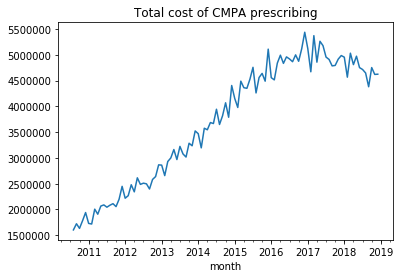

In [10]:
cmpa_df.groupby("month")['all_cost'].sum().plot(kind='line', title="Total cost of CMPA prescribing")

There has been a marked increase in the prescribing of CMPA, with nearly a four-fold increase since 2011.

## Modelling for measure 1

<module 'matplotlib.pyplot' from 'C:\\Users\\racro\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

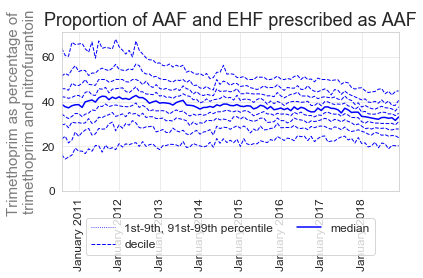

In [11]:
#create sample deciles

charts.deciles_chart(
        cmpa_df,
        period_column='month',
        column='aaf_percent_items',
        title="Proportion of AAF and EHF prescribed as AAF",
        show_outer_percentiles=False)

There is signficant variation in the proportion of AAF being prescribed. Considering that most guidance suggests approximately 10% of patients with CMPA require AAF, most CCGs appear to have over-prescribing.

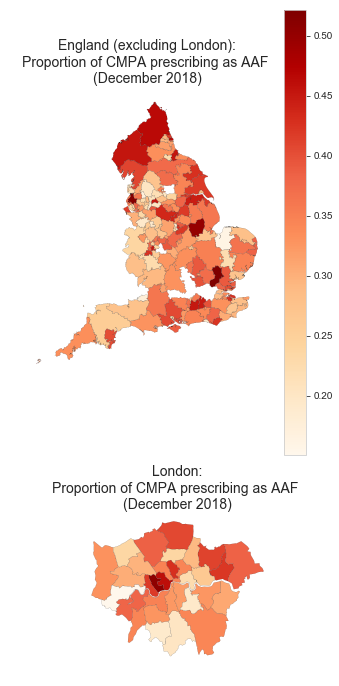

In [12]:
#create choropeth map of AAF proportion
latest_cmpa_df = cmpa_df.loc[cmpa_df['month'] == '2018-12-01']
plt = maps.ccg_map(latest_cmpa_df, title="Proportion of CMPA prescribing as AAF \n(December 2018)", column='aaf_percent_items', separate_london=True)
plt.show()

## Modelling for measure 2

In [13]:
# get data for patient list size (children aged 0-4)
sql2 = """
SELECT month, pct_id AS pct, (sum(male_0_4 + female_0_4)) as pt_0_4
FROM ebmdatalab.hscic.practice_statistics
group by 
month, pct
order by
month, pct
"""
pt_0_4_df = bq.cached_read(sql2, csv_path='pt_0_4_df.csv')
pt_0_4_df['month'] = pt_0_4_df['month'].astype('datetime64[ns]')

In [14]:
#merge dataframes

per_1000_df = pd.merge(cmpa_df, pt_0_4_df, on=['month', 'pct'])
per_1000_df['cost_per_1000'] = 1000* (per_1000_df['all_cost']/per_1000_df['pt_0_4'])

<module 'matplotlib.pyplot' from 'C:\\Users\\racro\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

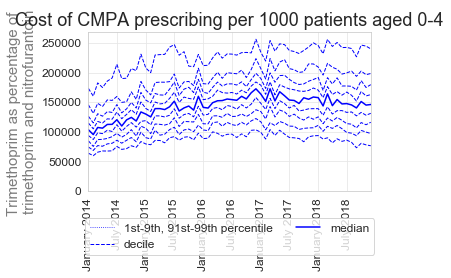

In [15]:
#create sample deciles

charts.deciles_chart(
        per_1000_df,
        period_column='month',
        column='cost_per_1000',
        title="Cost of CMPA prescribing per 1000 patients aged 0-4",
        show_outer_percentiles=False)

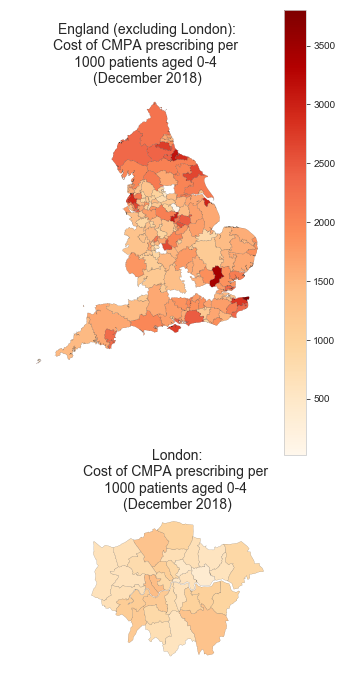

In [16]:
#create choropeth map of cost per 1000 patients
latest_per_1000_df = per_1000_df.loc[per_1000_df['month'] == '2018-12-01']
plt = maps.ccg_map(latest_per_1000_df, title="Cost of CMPA prescribing per \n1000 patients aged 0-4 \n(December 2018)", column='cost_per_1000', separate_london=True)
plt.show()